In [44]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import os
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

In [45]:
import plotting
import bivariate_plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [47]:
data = pd.read_csv("hotspot_vind_censustract.csv")

In [50]:
data = data[['heatday', 'wfday', 'coldday', 'polluted',
       'smoke_pm_non_zero', 'smoke_pm_gt_five', 'hw', 'hp', 'hwp', 'hws_',
       'hs', 'hws', 'ws', 'hs5', 'hws5', 'ws5', 'FIPS', 'STCNTY', 'RPL_THEMES']]

In [51]:
data = data.rename(columns={
    'RPL_THEMES': 'y'})
data['y']=data['y']*100
data['y']=data['y'].astype(int)

In [52]:
gdf = gpd.read_file("data/esri/FIPSMapping.gdb")

In [53]:
gdf.FIPS_1 = gdf['FIPS_1'].astype(int)

In [54]:
data = gdf.merge(data, left_on="FIPS_1", right_on="FIPS")

In [55]:
# Custom colormap
colors = bivariate_plotting.color_sets["pink-blue"]
cmap = ListedColormap(colors)

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


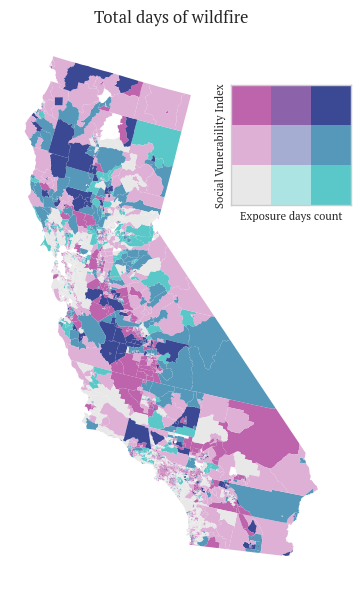

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


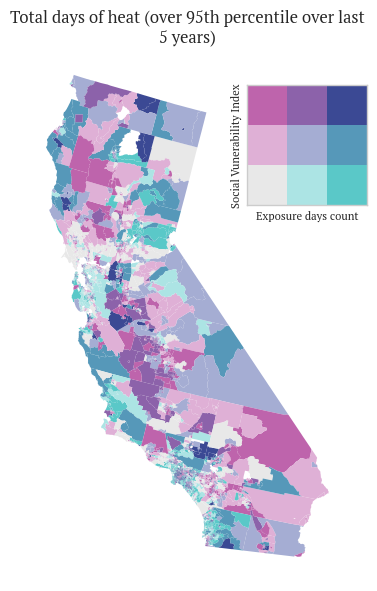

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


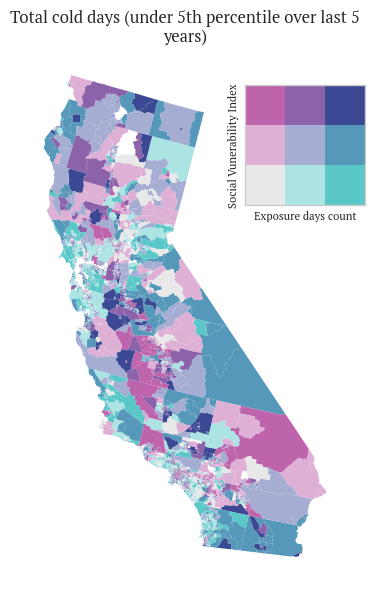

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


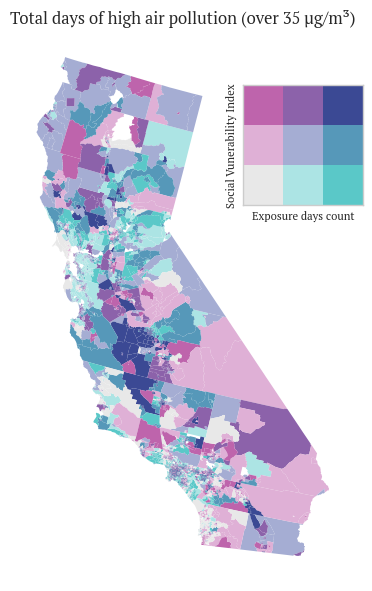

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


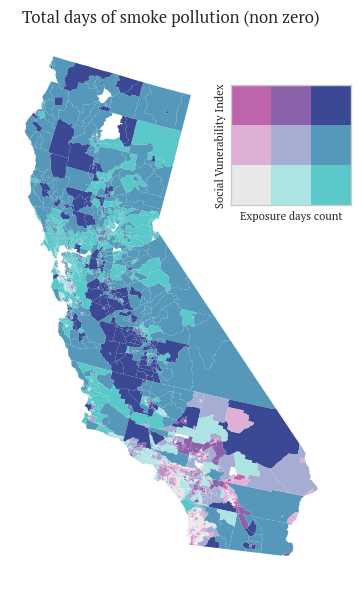

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


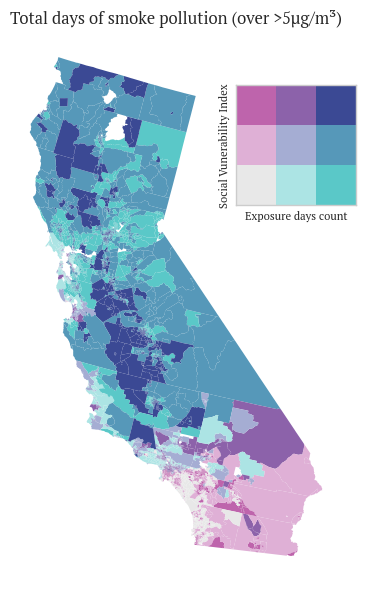

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


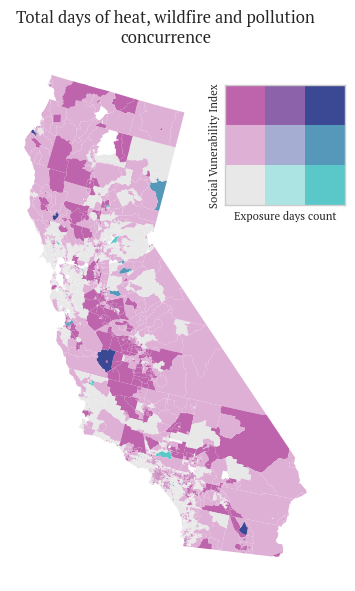

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


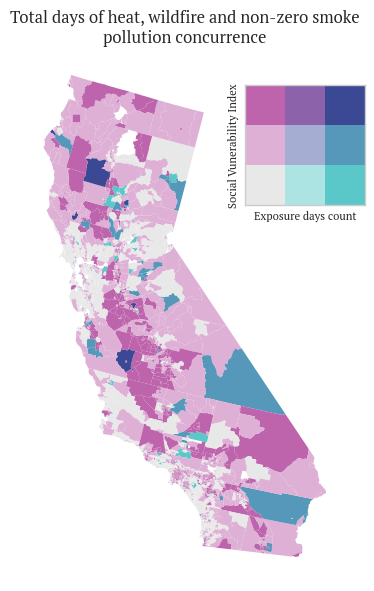

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


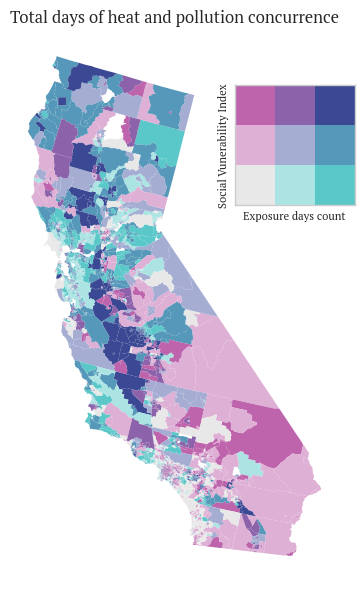

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


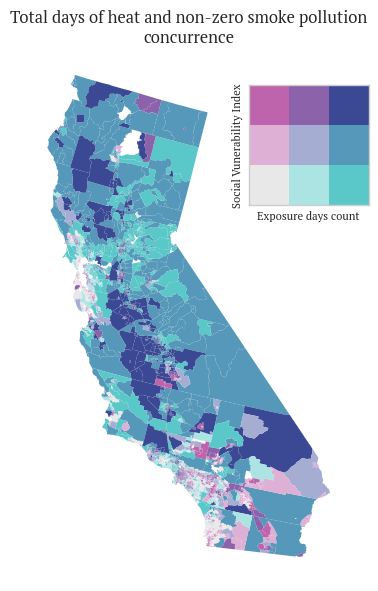

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


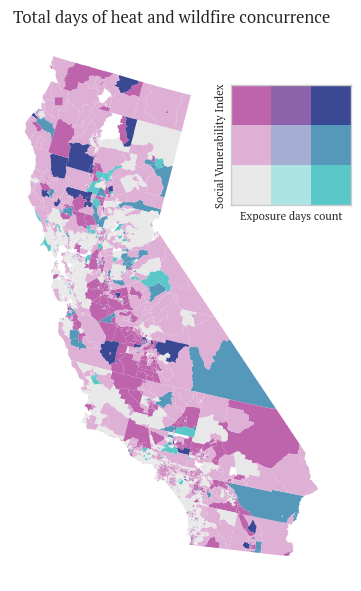

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


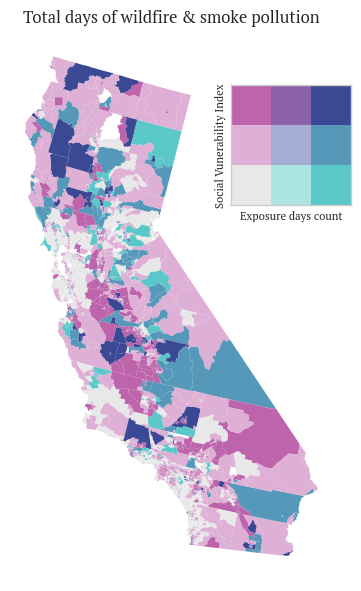

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


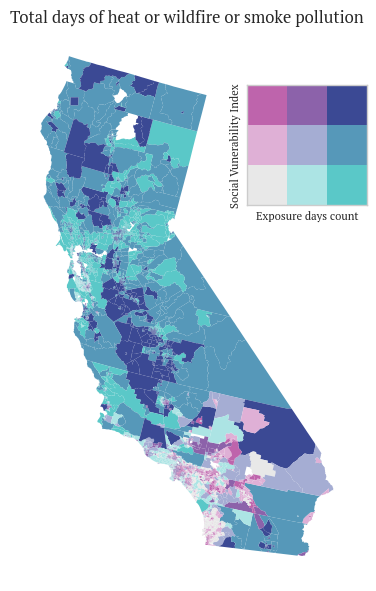

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


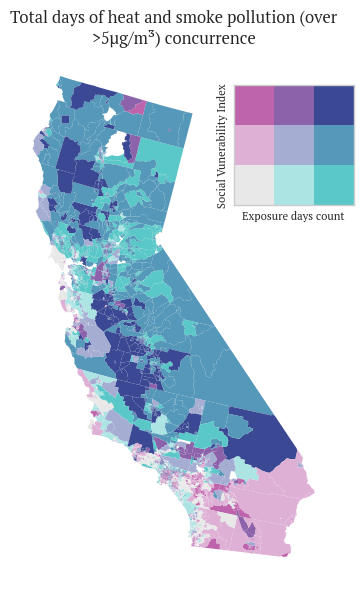

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


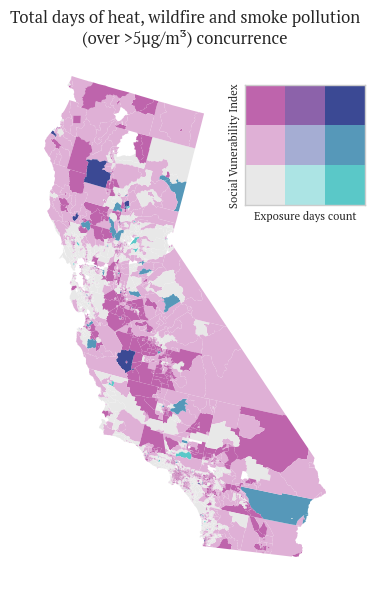

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_49763/2948014399.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


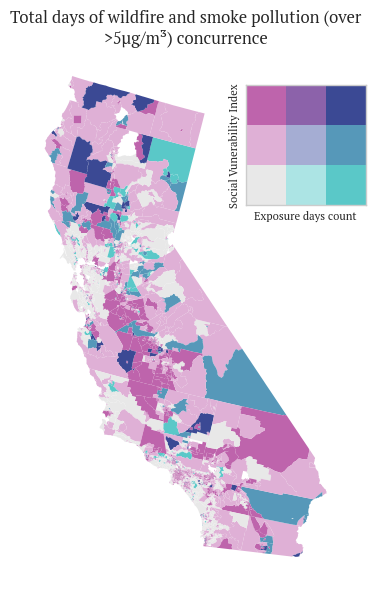

In [56]:
for x in hs_dict.keys():
    data = bivariate_plotting.prepare_df(data, x=x, y="y")
    fig, ax = plt.subplots(1, 1, figsize=(6,6))

    # Assuming 'data' is a Geopandas dataframe
    data.plot(
        column="biv_bins",
        ax=ax,
        cmap=cmap,
        legend=False,
        linewidth=0,
        missing_kwds={"color": "lightgrey"},
    )
    wrapped_title = textwrap.fill(hs_dict[x]["title_map"], 50)
    ax.set_title(wrapped_title, fontsize=12)
    ax.set_axis_off()

    # Add a second axes for the colorbar
    ax2 = fig.add_axes([0.6, 0.65, 0.2, 0.2])
    data1 = np.array(
        [
            [7, 8, 9],
            [4, 5, 6],
            [1, 2, 3],
        ]
    )

    # Use imshow to display the color square in the second axes
    im = ax2.imshow(data1, cmap=cmap, aspect="auto")

    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xlabel("Exposure days count", fontsize=8)
    ax2.set_ylabel("Social Vunerability Index", fontsize=8)

    # Show the plot
    plt.tight_layout()
    plt.savefig("figures/bivariate_census_" + hs_dict[x]["title"] + ".png")
    plt.show()